In [265]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np
import contractions
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /Users/wanqian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [252]:
df = pd.read_excel(r'/Users/wanqian/pytorch-test/IR/labelled_data.xlsx')

df

,title,reviewDescription,Sentiment
0,Good price,Returned,1
1,Device working as advertised,Like the size,1
2,"Looks Good, Battery Sucks",Phone arrived and appeared to be in pristine c...,0
3,Like new,Excellent condition,1
4,Battery disappointment,It has taken me some time getting use to this ...,0
...,...,...,...
1217,"If purchased from CPRTX, return inmediately an...","I don't usually write bad reviews, specially o...",-1
1218,.,Was not pleased with the packaging of the phone.,-1
1219,Great phone,Great phone renewed like new. Wish it was a sm...,1
1220,Wrong charger & charging cable sent,Was traveling when my phone died. Secured thi...,-1


In [253]:
# Calculate number of -1s
count_minus_ones = df['Sentiment'].value_counts().get(-1, 3)
print("Number of '-1' sentiments:", count_minus_ones)

#Calculate number of 1s
count_positive_ones = df['Sentiment'].value_counts().get(1, 3)
print("Number of '1' sentiments:", count_positive_ones)


#Calculate number of 0s
count_neutral = df['Sentiment'].value_counts().get(0, 3)
print("Number of '0' sentiments:", count_neutral)

Number of '-1' sentiments: 581
Number of '1' sentiments: 508
Number of '0' sentiments: 133


<Axes: >

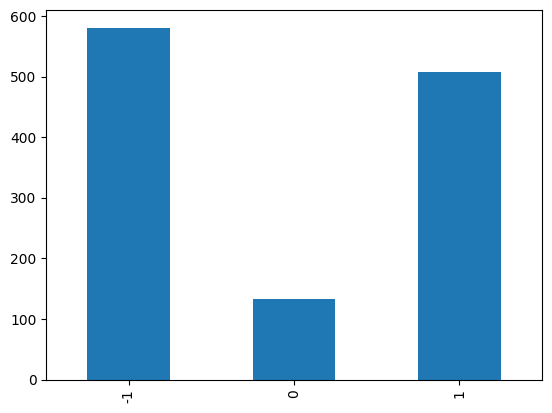

In [254]:
df['Sentiment'] = df['Sentiment'].astype('category')
df['Sentiment'].value_counts().sort_index().plot.bar()


In [ ]:


def wordCloudFunction(df,column,numWords):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    word_string=str(popular_words_nonstop)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=numWords,
                          width=1000,height=1000,
                         ).generate(word_string)
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

In [227]:
# Remove non-ASCII characters from 'title' and 'reviewDescription'
pattern = re.compile("[^\x00-\x7F]+")
df['title'] = df['title'].apply(lambda x: pattern.sub('', str(x)))
df['reviewDescription'] = df['reviewDescription'].apply(lambda x: pattern.sub('', str(x)))

In [228]:
df['text'] = df.apply(lambda row: row['title'] + ' ' + row['reviewDescription'], axis=1)
df.drop(['title', 'reviewDescription'], axis=1, inplace=True)

In [229]:
df


,rating,productAsin,reviewDate,size,color,service_provider,product_grade,review_link,image_links,text
0,4,B088NQXD8T,"Reviewed in the United States on March 29, 2023",64GB,Red,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R3...,[],It may just be my bad luck Ok so the iPhone I...
1,4,B088NQXD8T,"Reviewed in the United States on March 16, 2023",128GB,Red,Unlocked,Renewed Premium,https://www.amazon.com//gp/customer-reviews/R1...,[],Renewed Premium - Excellent condition but 91% ...
2,4,B088NQXD8T,"Reviewed in the United States on March 20, 2023",128GB,Red,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R1...,[],"Very Good Phone appears very clean, can be alm..."
3,4,B088NQXD8T,"Reviewed in the United States on March 20, 2023",256GB,Red,AT&T,Renewed,https://www.amazon.com//gp/customer-reviews/R1...,['https://m.media-amazon.com/images/W/IMAGEREN...,The phone arrived early and looks nearly new. ...
4,4,B088NQXD8T,"Reviewed in the United States on March 1, 2023",128GB,White,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R2...,['https://m.media-amazon.com/images/I/51YzAIX5...,Wouldn't Consider Excellent Condition But Real...
...,...,...,...,...,...,...,...,...,...,...
11540,1,B07P6Y8L3F,"Reviewed in the United States on January 26, 2021",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R3...,[],My iphone XR is not working properly My new ip...
11541,1,B07P6Y8L3F,"Reviewed in the United States on December 2, 2021",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R3...,[],The battery life is not last long The battery ...
11542,1,B07P6Y8L3F,"Reviewed in the United States on July 6, 2021",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R1...,[],"nan I purchased this phone on May 21st, 2021 a..."
11543,1,B07P6Y8L3F,"Reviewed in the United States on December 27, ...",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/RB...,[],Not Happy The battery life & shipping time are...


In [230]:
#lowercase
df['text_cleaned'] = df['text'].str.lower()

In [231]:
# #convert lists back to strings
# df['text_cleaned'] = df['text_cleaned'].apply(lambda x: ' '.join(x))

#expand contractions: wouldnt-> would not 
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: ' '.join([contractions.fix(word) for word in x.split()]))


In [232]:
#remove emoticons e.g. loc 40 
df['text_cleaned'] = df['text_cleaned'].replace(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:|=^.^=|0_o,'
                                                      r'' , regex=True)
    
#remove punctuations 
df['text_cleaned'] = df['text_cleaned'].str.replace(r'[^\w\s]+', '')

/var/folders/qd/h4t1gv7s69z7q8m9zzg1t0lh0000gn/T/ipykernel_46619/65612847.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text_cleaned'] = df['text_cleaned'].str.replace(r'[^\w\s]+', '')


In [233]:
df

,rating,productAsin,reviewDate,size,color,service_provider,product_grade,review_link,image_links,text,text_cleaned
0,4,B088NQXD8T,"Reviewed in the United States on March 29, 2023",64GB,Red,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R3...,[],It may just be my bad luck Ok so the iPhone I...,it may just be my bad luck ok so the iphone i ...
1,4,B088NQXD8T,"Reviewed in the United States on March 16, 2023",128GB,Red,Unlocked,Renewed Premium,https://www.amazon.com//gp/customer-reviews/R1...,[],Renewed Premium - Excellent condition but 91% ...,renewed premium excellent condition but 91 ba...
2,4,B088NQXD8T,"Reviewed in the United States on March 20, 2023",128GB,Red,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R1...,[],"Very Good Phone appears very clean, can be alm...",very good phone appears very clean can be almo...
3,4,B088NQXD8T,"Reviewed in the United States on March 20, 2023",256GB,Red,AT&T,Renewed,https://www.amazon.com//gp/customer-reviews/R1...,['https://m.media-amazon.com/images/W/IMAGEREN...,The phone arrived early and looks nearly new. ...,the phone arrived early and looks nearly new m...
4,4,B088NQXD8T,"Reviewed in the United States on March 1, 2023",128GB,White,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R2...,['https://m.media-amazon.com/images/I/51YzAIX5...,Wouldn't Consider Excellent Condition But Real...,would not consider excellent condition but rea...
...,...,...,...,...,...,...,...,...,...,...,...
11540,1,B07P6Y8L3F,"Reviewed in the United States on January 26, 2021",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R3...,[],My iphone XR is not working properly My new ip...,my iphone xr is not working properly my new ip...
11541,1,B07P6Y8L3F,"Reviewed in the United States on December 2, 2021",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R3...,[],The battery life is not last long The battery ...,the battery life is not last long the battery ...
11542,1,B07P6Y8L3F,"Reviewed in the United States on July 6, 2021",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R1...,[],"nan I purchased this phone on May 21st, 2021 a...",nan i purchased this phone on may 21st 2021 an...
11543,1,B07P6Y8L3F,"Reviewed in the United States on December 27, ...",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/RB...,[],Not Happy The battery life & shipping time are...,not happy the battery life shipping time are ...


In [234]:
def check_empty_column(df): 
    for col in df.columns:
        print(col, df[col].isnull().sum())

check_empty_column(df)

rating 0
productAsin 0
reviewDate 0
size 19
color 19
service_provider 19
product_grade 19
review_link 0
image_links 1
text 0
text_cleaned 0


In [235]:
# Load the Excel sheet containing slangs and their corresponding text
slangs_df = pd.read_csv(r'/Users/wanqian/pytorch-test/Data/Slangs.csv')

# Create a dictionary with slangs as keys and their corresponding text as values
slangs_dict = {}
for index, row in slangs_df.iterrows():
    slangs_dict[row['Slang']] = row['Text']

# Define a function to replace slangs in a reviews with their corresponding text
def preprocess_text(text):
    words = text.split()
    new_words = []
    for word in words:
        if word in slangs_dict:
            new_words.append(slangs_dict[word])
        else:
            new_words.append(word)
    return " ".join(new_words)

# Preprocess the reviews using the defined function
df['text_cleaned'] = df['text_cleaned'].apply(preprocess_text)

# Print the preprocessed reviews dataframe
df

,rating,productAsin,reviewDate,size,color,service_provider,product_grade,review_link,image_links,text,text_cleaned
0,4,B088NQXD8T,"Reviewed in the United States on March 29, 2023",64GB,Red,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R3...,[],It may just be my bad luck Ok so the iPhone I...,it may just be my bad luck ok so the iphone i ...
1,4,B088NQXD8T,"Reviewed in the United States on March 16, 2023",128GB,Red,Unlocked,Renewed Premium,https://www.amazon.com//gp/customer-reviews/R1...,[],Renewed Premium - Excellent condition but 91% ...,renewed premium excellent condition but 91 bat...
2,4,B088NQXD8T,"Reviewed in the United States on March 20, 2023",128GB,Red,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R1...,[],"Very Good Phone appears very clean, can be alm...",very good phone appears very clean can be almo...
3,4,B088NQXD8T,"Reviewed in the United States on March 20, 2023",256GB,Red,AT&T,Renewed,https://www.amazon.com//gp/customer-reviews/R1...,['https://m.media-amazon.com/images/W/IMAGEREN...,The phone arrived early and looks nearly new. ...,the phone arrived early and looks nearly new m...
4,4,B088NQXD8T,"Reviewed in the United States on March 1, 2023",128GB,White,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R2...,['https://m.media-amazon.com/images/I/51YzAIX5...,Wouldn't Consider Excellent Condition But Real...,would not consider excellent condition but rea...
...,...,...,...,...,...,...,...,...,...,...,...
11540,1,B07P6Y8L3F,"Reviewed in the United States on January 26, 2021",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R3...,[],My iphone XR is not working properly My new ip...,my iphone xr is not working properly my new ip...
11541,1,B07P6Y8L3F,"Reviewed in the United States on December 2, 2021",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R3...,[],The battery life is not last long The battery ...,the battery life is not last long the battery ...
11542,1,B07P6Y8L3F,"Reviewed in the United States on July 6, 2021",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R1...,[],"nan I purchased this phone on May 21st, 2021 a...",nan i purchased this phone on may 21st 2021 an...
11543,1,B07P6Y8L3F,"Reviewed in the United States on December 27, ...",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/RB...,[],Not Happy The battery life & shipping time are...,not happy the battery life shipping time are t...


In [236]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    """Function to remove stopwords from text"""
    filtered_text = []
    for word in text.split():
        if word.lower() not in stop_words:
            filtered_text.append(word.lower())
    return " ".join(filtered_text)

df['text_cleaned'] = df['text_cleaned'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wanqian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [237]:
df

,rating,productAsin,reviewDate,size,color,service_provider,product_grade,review_link,image_links,text,text_cleaned
0,4,B088NQXD8T,"Reviewed in the United States on March 29, 2023",64GB,Red,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R3...,[],It may just be my bad luck Ok so the iPhone I...,may bad luck ok iphone received 910 cosmetical...
1,4,B088NQXD8T,"Reviewed in the United States on March 16, 2023",128GB,Red,Unlocked,Renewed Premium,https://www.amazon.com//gp/customer-reviews/R1...,[],Renewed Premium - Excellent condition but 91% ...,renewed premium excellent condition 91 battery...
2,4,B088NQXD8T,"Reviewed in the United States on March 20, 2023",128GB,Red,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R1...,[],"Very Good Phone appears very clean, can be alm...",good phone appears clean almost called brand n...
3,4,B088NQXD8T,"Reviewed in the United States on March 20, 2023",256GB,Red,AT&T,Renewed,https://www.amazon.com//gp/customer-reviews/R1...,['https://m.media-amazon.com/images/W/IMAGEREN...,The phone arrived early and looks nearly new. ...,phone arrived early looks nearly new complaint...
4,4,B088NQXD8T,"Reviewed in the United States on March 1, 2023",128GB,White,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R2...,['https://m.media-amazon.com/images/I/51YzAIX5...,Wouldn't Consider Excellent Condition But Real...,would consider excellent condition really good...
...,...,...,...,...,...,...,...,...,...,...,...
11540,1,B07P6Y8L3F,"Reviewed in the United States on January 26, 2021",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R3...,[],My iphone XR is not working properly My new ip...,iphone xr working properly new iphone xr flick...
11541,1,B07P6Y8L3F,"Reviewed in the United States on December 2, 2021",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R3...,[],The battery life is not last long The battery ...,battery life last long battery life last long ...
11542,1,B07P6Y8L3F,"Reviewed in the United States on July 6, 2021",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R1...,[],"nan I purchased this phone on May 21st, 2021 a...",nan purchased phone may 21st 2021 line appeare...
11543,1,B07P6Y8L3F,"Reviewed in the United States on December 27, ...",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/RB...,[],Not Happy The battery life & shipping time are...,happy battery life shipping time good things p...


In [238]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    """
    Map POS tag to first character used by WordNetLemmatizer
    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN # return NOUN as default

In [239]:
df

,rating,productAsin,reviewDate,size,color,service_provider,product_grade,review_link,image_links,text,text_cleaned
0,4,B088NQXD8T,"Reviewed in the United States on March 29, 2023",64GB,Red,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R3...,[],It may just be my bad luck Ok so the iPhone I...,may bad luck ok iphone received 910 cosmetical...
1,4,B088NQXD8T,"Reviewed in the United States on March 16, 2023",128GB,Red,Unlocked,Renewed Premium,https://www.amazon.com//gp/customer-reviews/R1...,[],Renewed Premium - Excellent condition but 91% ...,renewed premium excellent condition 91 battery...
2,4,B088NQXD8T,"Reviewed in the United States on March 20, 2023",128GB,Red,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R1...,[],"Very Good Phone appears very clean, can be alm...",good phone appears clean almost called brand n...
3,4,B088NQXD8T,"Reviewed in the United States on March 20, 2023",256GB,Red,AT&T,Renewed,https://www.amazon.com//gp/customer-reviews/R1...,['https://m.media-amazon.com/images/W/IMAGEREN...,The phone arrived early and looks nearly new. ...,phone arrived early looks nearly new complaint...
4,4,B088NQXD8T,"Reviewed in the United States on March 1, 2023",128GB,White,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R2...,['https://m.media-amazon.com/images/I/51YzAIX5...,Wouldn't Consider Excellent Condition But Real...,would consider excellent condition really good...
...,...,...,...,...,...,...,...,...,...,...,...
11540,1,B07P6Y8L3F,"Reviewed in the United States on January 26, 2021",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R3...,[],My iphone XR is not working properly My new ip...,iphone xr working properly new iphone xr flick...
11541,1,B07P6Y8L3F,"Reviewed in the United States on December 2, 2021",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R3...,[],The battery life is not last long The battery ...,battery life last long battery life last long ...
11542,1,B07P6Y8L3F,"Reviewed in the United States on July 6, 2021",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R1...,[],"nan I purchased this phone on May 21st, 2021 a...",nan purchased phone may 21st 2021 line appeare...
11543,1,B07P6Y8L3F,"Reviewed in the United States on December 27, ...",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/RB...,[],Not Happy The battery life & shipping time are...,happy battery life shipping time good things p...


In [240]:
#tokenize column to prepare lemmatization
df['text_tokenize'] = df['text_cleaned'].apply(word_tokenize)
    
    
#Lemmatize reviews  
df['text_lemmatized'] = df['text_tokenize'].apply(nltk.tag.pos_tag)


df['text_lemmatized'] = df['text_lemmatized'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])


#apply NLTK lemmatization
wnl = WordNetLemmatizer()
df['text_lemmatized'] = df['text_lemmatized'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

#convert back to strings
df['text_lemmatized']  = [' '.join(map(str, l)) for l in df['text_lemmatized']]

In [241]:
df

,rating,productAsin,reviewDate,size,color,service_provider,product_grade,review_link,image_links,text,text_cleaned,text_tokenize,text_lemmatized
0,4,B088NQXD8T,"Reviewed in the United States on March 29, 2023",64GB,Red,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R3...,[],It may just be my bad luck Ok so the iPhone I...,may bad luck ok iphone received 910 cosmetical...,"[may, bad, luck, ok, iphone, received, 910, co...",may bad luck ok iphone receive 910 cosmeticall...
1,4,B088NQXD8T,"Reviewed in the United States on March 16, 2023",128GB,Red,Unlocked,Renewed Premium,https://www.amazon.com//gp/customer-reviews/R1...,[],Renewed Premium - Excellent condition but 91% ...,renewed premium excellent condition 91 battery...,"[renewed, premium, excellent, condition, 91, b...",renew premium excellent condition 91 battery p...
2,4,B088NQXD8T,"Reviewed in the United States on March 20, 2023",128GB,Red,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R1...,[],"Very Good Phone appears very clean, can be alm...",good phone appears clean almost called brand n...,"[good, phone, appears, clean, almost, called, ...",good phone appear clean almost call brand new ...
3,4,B088NQXD8T,"Reviewed in the United States on March 20, 2023",256GB,Red,AT&T,Renewed,https://www.amazon.com//gp/customer-reviews/R1...,['https://m.media-amazon.com/images/W/IMAGEREN...,The phone arrived early and looks nearly new. ...,phone arrived early looks nearly new complaint...,"[phone, arrived, early, looks, nearly, new, co...",phone arrive early look nearly new complaint w...
4,4,B088NQXD8T,"Reviewed in the United States on March 1, 2023",128GB,White,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R2...,['https://m.media-amazon.com/images/I/51YzAIX5...,Wouldn't Consider Excellent Condition But Real...,would consider excellent condition really good...,"[would, consider, excellent, condition, really...",would consider excellent condition really good...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11540,1,B07P6Y8L3F,"Reviewed in the United States on January 26, 2021",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R3...,[],My iphone XR is not working properly My new ip...,iphone xr working properly new iphone xr flick...,"[iphone, xr, working, properly, new, iphone, x...",iphone xr work properly new iphone xr flicker ...
11541,1,B07P6Y8L3F,"Reviewed in the United States on December 2, 2021",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R3...,[],The battery life is not last long The battery ...,battery life last long battery life last long ...,"[battery, life, last, long, battery, life, las...",battery life last long battery life last long ...
11542,1,B07P6Y8L3F,"Reviewed in the United States on July 6, 2021",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R1...,[],"nan I purchased this phone on May 21st, 2021 a...",nan purchased phone may 21st 2021 line appeare...,"[nan, purchased, phone, may, 21st, 2021, line,...",nan purchase phone may 21st 2021 line appear s...
11543,1,B07P6Y8L3F,"Reviewed in the United States on December 27, ...",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/RB...,[],Not Happy The battery life & shipping time are...,happy battery life shipping time good things p...,"[happy, battery, life, shipping, time, good, t...",happy battery life shipping time good thing pr...


In [242]:
df['text'] = df['text_lemmatized']

In [243]:
df = df.drop(columns=['text_cleaned', 'text_tokenize', 'text_lemmatized'])

In [244]:
df

,rating,productAsin,reviewDate,size,color,service_provider,product_grade,review_link,image_links,text
0,4,B088NQXD8T,"Reviewed in the United States on March 29, 2023",64GB,Red,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R3...,[],may bad luck ok iphone receive 910 cosmeticall...
1,4,B088NQXD8T,"Reviewed in the United States on March 16, 2023",128GB,Red,Unlocked,Renewed Premium,https://www.amazon.com//gp/customer-reviews/R1...,[],renew premium excellent condition 91 battery p...
2,4,B088NQXD8T,"Reviewed in the United States on March 20, 2023",128GB,Red,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R1...,[],good phone appear clean almost call brand new ...
3,4,B088NQXD8T,"Reviewed in the United States on March 20, 2023",256GB,Red,AT&T,Renewed,https://www.amazon.com//gp/customer-reviews/R1...,['https://m.media-amazon.com/images/W/IMAGEREN...,phone arrive early look nearly new complaint w...
4,4,B088NQXD8T,"Reviewed in the United States on March 1, 2023",128GB,White,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R2...,['https://m.media-amazon.com/images/I/51YzAIX5...,would consider excellent condition really good...
...,...,...,...,...,...,...,...,...,...,...
11540,1,B07P6Y8L3F,"Reviewed in the United States on January 26, 2021",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R3...,[],iphone xr work properly new iphone xr flicker ...
11541,1,B07P6Y8L3F,"Reviewed in the United States on December 2, 2021",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R3...,[],battery life last long battery life last long ...
11542,1,B07P6Y8L3F,"Reviewed in the United States on July 6, 2021",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/R1...,[],nan purchase phone may 21st 2021 line appear s...
11543,1,B07P6Y8L3F,"Reviewed in the United States on December 27, ...",64GB,Black,Unlocked,Renewed,https://www.amazon.com//gp/customer-reviews/RB...,[],happy battery life shipping time good thing pr...


In [245]:
num_unique_words = len(df['text'].str.split(expand=True).stack().unique())
print ('Number of unique words = ', num_unique_words)

Number of unique words =  11215


In [246]:
words = df['text'].str.split()


In [247]:
check_empty_column(df)

rating 0
productAsin 0
reviewDate 0
size 19
color 19
service_provider 19
product_grade 19
review_link 0
image_links 1
text 0


In [248]:
df.to_csv('~/pytorch-test/IR/preprocessed_all.csv')